In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import py3Dmol
import glob
import os
import sidechainnet
from tqdm import tqdm
sns.set_style('darkgrid')
%cd /net/pulsar/home/koes/jok120/openfold
%matplotlib inline

/net/pulsar/home/koes/jok120/openfold


In [15]:
# We will now investigate the raw data. We will look at the raw sidechainnet input
# as well as the OpenMM minimized structures

unmin_dir = "/net/pulsar/home/koes/jok120/scnmin221001/unmin"
min_dir =   "/net/pulsar/home/koes/jok120/scnmin221013/min"
# min_dir =   "/net/pulsar/home/koes/jok120/scnmin221001/min"

# Load items into scnproteins

In [16]:
data = []
for min_pkl in tqdm(glob.glob(os.path.join(min_dir, "*.pkl"))):
    unmin_pkl = min_pkl.replace(min_dir, unmin_dir)
    
    p_unmin = sidechainnet.SCNProtein.from_pkl(unmin_pkl)
    p_min = sidechainnet.SCNProtein.from_pkl(min_pkl)
    p_unmin.torch()
    p_min.torch()
    item = (p_min.id, p_min.rmsd_to(p_unmin))
    # print(*item)
    data.append(item)
                
    # break
    # p.unmin.add_hydrogens()    
    

100%|██████████| 53755/53755 [25:24<00:00, 35.25it/s] 


In [17]:
with open("problematic_ids.txt", "w") as f:
    for id, rmsd in data:
        if rmsd > 1:
            f.write(f"{id}\n")

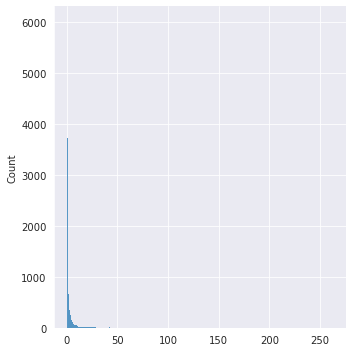

In [18]:
sns.displot([a[1] for a in data])

In [ ]:
p_unmin.cpu()
p_unmin.add_hydrogens(add_to_heavy_atoms=True)

In [6]:
p_unmin = sidechainnet.SCNProtein.from_pkl(unmin_pkl)
p_min = sidechainnet.SCNProtein.from_pkl(min_pkl)
p_unmin.torch()
p_min.torch()
p_unmin, p_min
p_unmin.to_3Dmol()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
p_min.to_3Dmol()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
p_min.rmsd_to(p_unmin)

7.318827629837268

In [ ]:
p_unmin.coords.shape

In [ ]:
p_min.coords.shape

# Visual Analysis

In [ ]:
N = 3
START = 2
view = py3Dmol.view(width=1200, height=1400, viewergrid=(N, 3))

for i, protein_name in enumerate(get_protein_names(df_sorted, n=N, start=START)):
    query, chain = protein_name.split("_")
    print(query, chain)

    pdb_filenames = get_pred_true_filenames(protein_name)
    with open(pdb_filenames[0], "r") as f:
        pred_str = f.read()
    with open(pdb_filenames[1], "r") as f:
        true_str = f.read() 

    view.addModel(pred_str, "pdb", viewer=(i, 0))
    view.addModel(true_str, "pdb", viewer=(i, 1))
    view.setStyle({'cartoon':{'color':'spectrum'}}, viewer=(i, 0))
    view.setStyle({'cartoon':{'color':'spectrum'}}, viewer=(i, 1))
    
    # How to add true RCSB structure via chain?
    rcsb_url = f"https://files.rcsb.org/download/{query}.cif"
    print(rcsb_url)
    # download file from url and store as string using requests
    import requests
    rcsb_str = requests.get(rcsb_url).text
    # print(rcsb_str)

    view.addModel(rcsb_str, "cif", viewer=(i, 2))
    # view.addModel(query="pdb:"+query, viewer=(i, 2))
    view.setStyle({'cartoon':{'color':'spectrum'}}, viewer=(i, 2))
    if len(chain) <= 3:
        view.setStyle({'hidden':{}}, viewer=(i, 2))
        view.setStyle({'chain': chain.upper()}, {'cartoon': {'color': 'spectrum'}}, viewer=(i, 2))

view.zoomTo()
view.show()

